<div class="alert alert-info">
<b>
</b> 
Основную цель проекта определим, как:
    
-Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Работу поделим на 5 частей:
    
1) Изучение общей информации и сбор данных.
    
2) Подготовка данных.
    
3) Проведение исследовательского анализа данных.
    
4) Портрет пользователей.
    
5) Проверка выдвинутых гипотез.
    
Будем стараться придерживаться плана и строить структурированную работу.

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Импортируем все необходимые на данном этапе библиотеки и выводим первые 5 строк таблицы.

In [3]:
data.columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


Приводим названия колонок к нижнему регистру.

In [4]:
print(data.head(50))


                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print(data.duplicated().sum())

0


Смотрим на типы данных, количество колонок и строк.
Ищем дубликаты

In [7]:

data= data[data['year_of_release'].notna()]
data= data[data['name'].notna()]
data= data[data['genre'].notna()]
data['year_of_release'] = data['year_of_release'].astype(int)

data['user_score']=data['user_score'].replace("tbd", "NaN")
data['user_score'] = data['user_score'].astype(float)



Удаляем название, жанр,год, так как без этих данных анализировать не получится и в целом потеря данных не значительно отразится на  финальном исследовани, так как потеряно мало данных.
Меняем тип  данных для столбцов год выпуска и оценка пользователей, так как для них понадобятся мат. операции. а без перевода в числовые значения не получится это сделать.
Меняем значение 'tbd' на 'NaN', т.к. скорее всего оценок еще не было, возможно игра была не столь популярна или не интересна, потому и осталась без оценок
К пропускам могли привести очень многие причины, например, некорректно заполнены данные, или отстутствие таковых.

<div class="alert alert-info">
<b>
</b> 
Явных дубликатов тут нет
</div>

In [8]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [9]:
data['total_sales'] = data[['na_sales',  'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [10]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


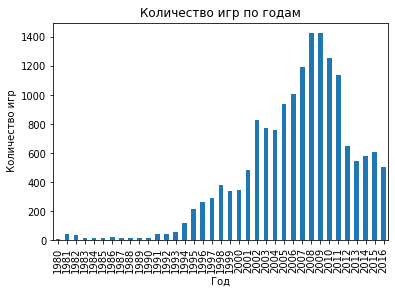

In [11]:
games_year = data['year_of_release'].value_counts().sort_index()
games_year.plot(kind = 'bar')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel(' Количество игр')
plt.show()

Сделали разбивку по количеству выпущенных игр в годах, максимальное количество было выпущено в 2008 году, почти такое же, как и в 2009, разница всего в одну игру.

<AxesSubplot:xlabel='year_of_release'>

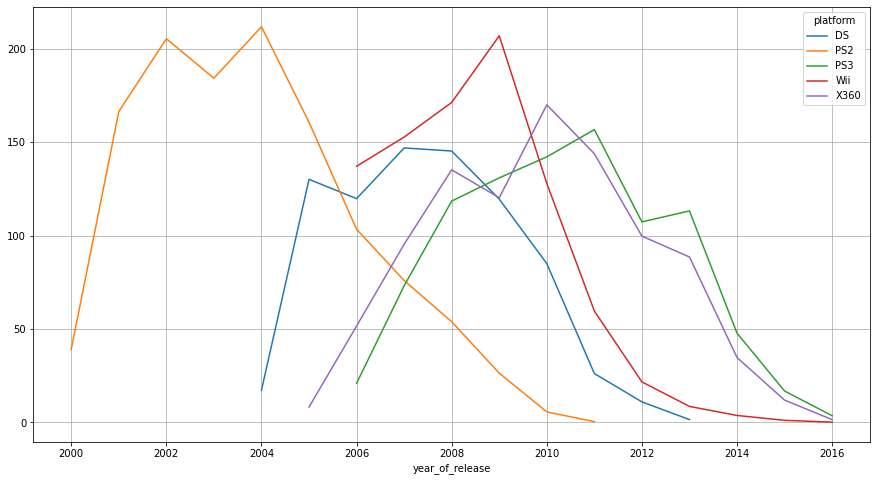

In [12]:
platf_year_sale = data.pivot_table(index = 'platform', values = 'total_sales',  aggfunc = 'sum')\
    .sort_values('total_sales', ascending = False)\
    .reset_index()

popular_platform = platf_year_sale.loc[0:4, 'platform'].to_list()

data.query(('platform in @popular_platform & 2000 <= year_of_release <= 2016'))  \
.pivot_table(index ='year_of_release', columns = 'platform', values = 'total_sales', aggfunc ='sum') \
.plot(grid  = True, figsize = (15,8))


Выделили топ 5 популярных платформ и продаж по ним, взяв дату с 2000 года и произвели  разбивку по годам, после построили график по полученным данным. В среднем хватает около 10 лет для того, чтоб интерес к платформе пропал.

In [1]:
( 
    data
    .query('year_of_release > 2013')
    .pivot_table(index = 'platform', columns ='year_of_release', values ='name', aggfunc = 'count')  
    
)



NameError: name 'data' is not defined

Рассмотрим количество игр выпускаемое на платформах с 2015 года, видим, что на рынке лидирующие позиции занимают платформы PS и XBOX. Платформа 3DS также, занимает высокое положение по количеству выпущенных игр, но с годами  теряет свое положение. так с 2013 по 2016 год количество упало почти в два раза. В каком бы годы не посмотреть лидера выпущенных игр, везде будет платформа PS меняется только ее поколение.

<div class="alert alert-info">
<b>
</b> 
Возьмем данные за 3 года, для получения более актуальной информации.
</div>

In [14]:
#( 
  #  data
  #  .query('year_of_release > 2015')
   # .pivot_table(index = 'platform', columns ='year_of_release', values ='name', aggfunc = 'count')  
#)


<AxesSubplot:xlabel='platform'>

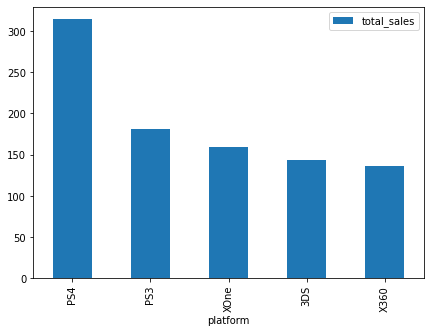

In [58]:
popular_pltf=( 
    data
    .query('2013 <= year_of_release <= 2016')
    .pivot_table(index = 'platform', values ='total_sales', aggfunc = 'sum')  
    .sort_values(by = 'total_sales', ascending = False).head(5)
    
)
popular_pltf.plot(y='total_sales', kind='bar', figsize = (7,5))



In [59]:
popular_pltf

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


(0.0, 4.0)

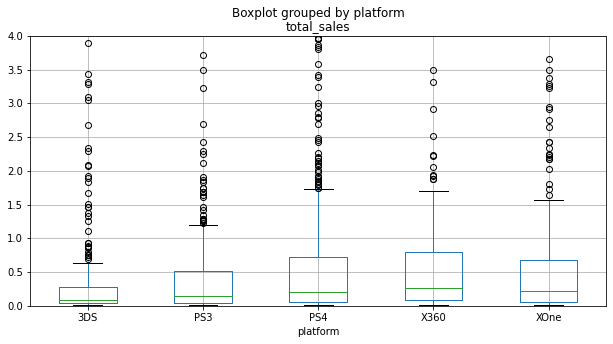

In [57]:


(data
    .query("platform == ['PS4', 'PS3', 'X360', 'XOne', '3DS'] and 2013 <= year_of_release <= 2016")
    .boxplot(column = 'total_sales', by ='platform', figsize = (10,5))
)
plt.ylim(0,4)



<div class="alert alert-info">
<b>
</b>
Определили популярные платформы за период 2013-2016г, отделили топ 5, получилось - PS4, PS3, X360, XOne, 3DS)
Действительно похоже на текущую ситуацию на рынке, лидируют Иксбокс и Плейстейшн, но все таки Плэйстейшн значительно популярнее конкурентов. На последнем месте Нинтендо.
</div>

In [18]:
#(data
   
  #  .query("platform == ['PS4', 'PS3', 'X360', 'XOne', '3DS']")
  #  .boxplot(column = 'total_sales', by ='platform', figsize = (10,5))
#)
#plt.ylim(0,4)

(0.0, 4.0)

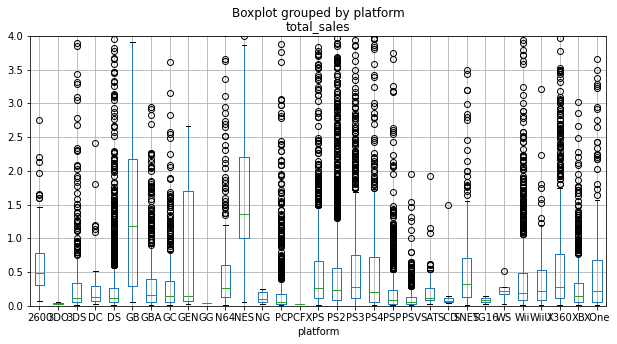

In [19]:
(data
    .loc[(data['total_sales'] <= 40) | ((data['total_sales']).isna())]
    .boxplot(column = 'total_sales', by ='platform', figsize = (10,5))
)
plt.ylim(0,4)

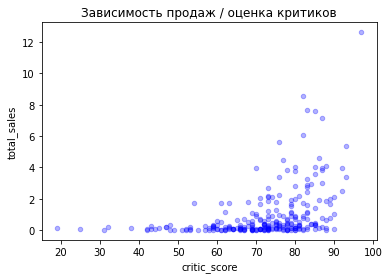

0.406567902061781


In [56]:
PS4 = data.query("platform == ['PS4'] and 2013 <= year_of_release <= 2016")
PS4.plot(x='critic_score', y='total_sales', kind='scatter',  alpha=0.3, color = 'blue', title ='Зависимость продаж / оценка критиков')
plt.show()
print(PS4['total_sales'].corr(PS4['critic_score']))

<div class="alert alert-info">
<b>
</b>
 Корреляция низкая, связи почти нет.
</div>

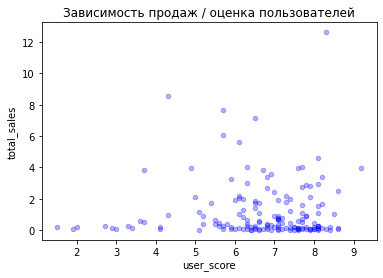

0.024230832360622557


In [21]:
PS4.plot(x='user_score', y='total_sales', kind='scatter',  alpha=0.3, color = 'blue', title ='Зависимость продаж / оценка пользователей')
plt.show()
print(PS4['user_score'].corr(PS4['total_sales']))

Зависимость между оценками критиков и продажами есть, но не высокая,
Между оценками пользователей и продажами ее почти нет. Разобрали на примере платформы ПС4

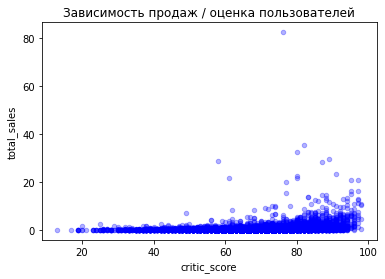

0.2453488454741138


In [22]:
data.plot(x='critic_score', y='total_sales', kind='scatter',  alpha=0.3, color = 'blue', title ='Зависимость продаж / оценка пользователей')
plt.show()
print(data['critic_score'].corr(data['total_sales']))

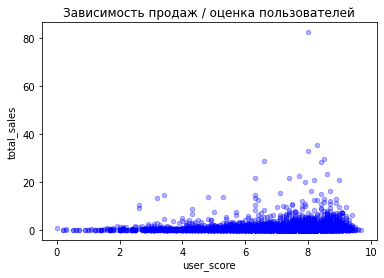

0.08798399271321647


In [23]:
data.plot(x='user_score', y='total_sales', kind='scatter',  alpha=0.3, color = 'blue', title ='Зависимость продаж / оценка пользователей')
plt.show()
print(data['user_score'].corr(data['total_sales']))

По всем платформам также корреляция достаточно низкая.

<AxesSubplot:xlabel='genre'>

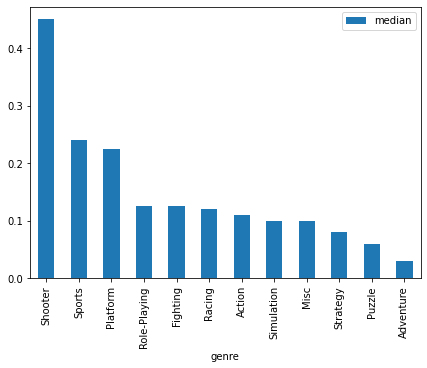

In [24]:
genre_sales=(
    data
    .query("2013 <= year_of_release <= 2016")
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = {'total_sales':'median'})
    .sort_values(by = 'total_sales', ascending= False)             
)
genre_sales.columns =['median']

genre_sales.plot(y='median', kind='bar', figsize = (7,5))




<div class="alert alert-info">
<b>
</b>
Изменила метод группировки на медианные значения, действительно, теперь хороший доход приносят другие жанры, например - 'Платформа', 'Шутер', 'Спорт', 'Борьба', 'Экшн'. Таким образом эти игры стабильно обеспечивают хорошую прибыль, следует уделить им особое внимание.
</div>

<div class="alert alert-info">
<b>
</b>
v2
Взяли актуальный преиод 2013-2016, отсортировали по убыванию, теперь легко определить топ жанров)</div>

Как ранее решили брать годы с 2013, выделили топ 5 платформ для Северной Америки, лидер среди всех ПС4, замыкает топ ПС3.

In [25]:
jp_sales_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Долевая разбивка платформ для Японии'}, ylabel='jp_sales'>

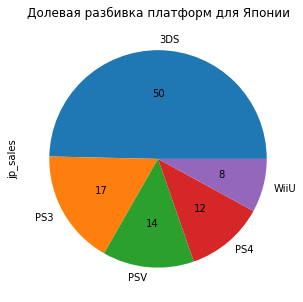

In [26]:
jp_sales_top.plot( y='jp_sales', x = 'platform', kind = 'pie', figsize =(10,5), autopct = '%.0f',  title = 'Долевая разбивка платформ для Японии')

Половину от всего рынка Японии занимает платформа 3DS, это неудивительно, так как эта платформа была выпущена в Японии, следовательно она должна быть хорошо адаптирована под жителей страны. даже гугл подтверждает, что 'Nintendo 3DS является одной из самых успешных систем за всю историю существования рынка'

In [27]:
na_sales_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Долевая разбивка платформ для Северной Америки'}, ylabel='na_sales'>

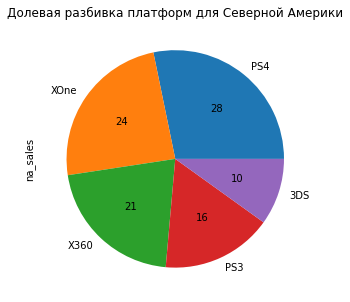

In [28]:
na_sales_top.plot( y='na_sales', x = 'platform', kind = 'pie', figsize =(10,5), autopct = '%.0f',  title = 'Долевая разбивка платформ для Северной Америки')

<div class="alert alert-info">
<b>
</b>
 После изменения, получилось, что вырвалась вперед PS4, и доли уже не такие и одинаковые, PS4 и XOne значительно опережают конкурентов.
</div>

<div class="alert alert-info">
<b>
</b> v2
Переделаем под 2013-2016 годы, теперь на диаграмме плавно распределились платформы, топ 3 - PS4, XOne, X360</div>

In [29]:
eu_sales_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Долевая разбивка платформ для Европы'}, ylabel='eu_sales'>

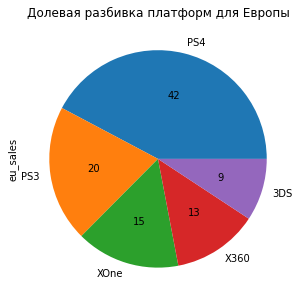

In [30]:
eu_sales_top.plot( y='eu_sales', x = 'platform', kind = 'pie', figsize =(10,5), autopct = '%.0f', title = 'Долевая разбивка платформ для Европы')

<div class="alert alert-info">
<b>
</b>
PS4 все также идет на первом месте, но сменилось второе, тут на втором месте XOne, а следом идут остальные платформы, суммарно они не занимают долю даже по одной платформы из топ 2.
</div>

<div class="alert alert-info">
<b>
</b> v2
Второе место занял ПS3 и третье ХOne
</div>

In [31]:
eu_jp_na_sales = pd.DataFrame(data=[na_sales_top,eu_sales_top, jp_sales_top,]).T

In [32]:
eu_jp_na_sales

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
PSV,NaN,NaN,18.59
WiiU,NaN,NaN,10.88


<AxesSubplot:title={'center':'Сравнение популярных платформ в разных регионах'}, xlabel='platform'>

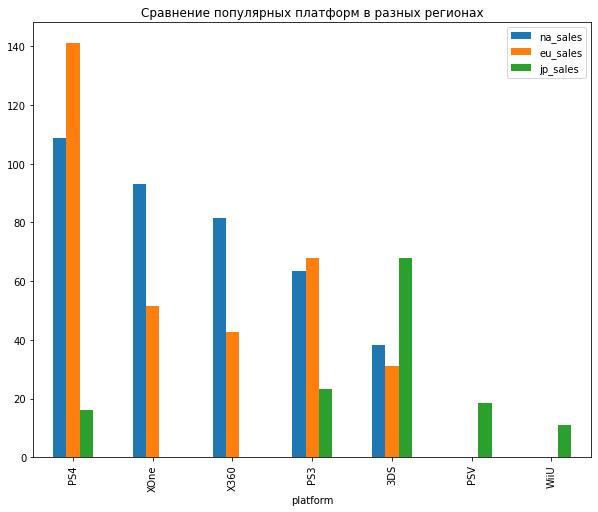

In [33]:
eu_jp_na_sales.plot(kind = 'bar', figsize =(10,8), title = 'Сравнение популярных платформ в разных регионах')

Американский рынок плавно снижается от платформы к платформе, это значит, что они распределены достаточно однородно,
в то время, как Европа от скачет от одной к другой, слишком большй разрыв между платформами. В Японии большая часть отдала предпочтение одной платформе - Нинтендо.

In [34]:
na_genre_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Популярные жанры в Северной Америке'}, ylabel='na_sales'>

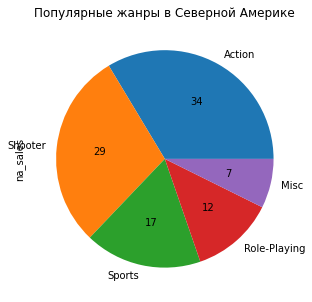

In [35]:
na_genre_top.plot( y='na_sales', kind = 'pie', figsize =(10,5), autopct = '%.0f', title = 'Популярные жанры в Северной Америке')

В Северной Америке видно, что люди отдают большее предпочтение играм жанров 'Экшн', 'Шутер', остальные игры не пользуются таким же  спросом.

<div class="alert alert-info">
<b>
</b>
    Хотя категория спорт тоже не далеко ушла, в целом распределение достаточно плавное.
</div>

In [36]:
eu_genre_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Популярные жанры в Европе'}, ylabel='eu_sales'>

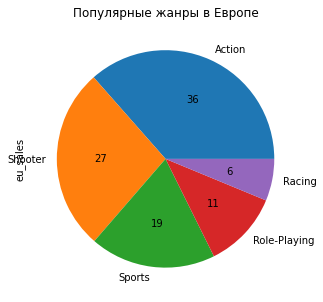

In [37]:
eu_genre_top.plot( y='eu_sales', kind = 'pie', figsize =(10,5), autopct = '%.0f', title = 'Популярные жанры в Европе')

Картина по Европе примерно одинакова с Америкой, тут люди также чаще выбирают 'Экшн' и 'Шутер', чем другие игры.


In [38]:
jp_genre_top =(
    data
    .query("2013 <= year_of_release <= 2016")
    .groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
)


<AxesSubplot:title={'center':'Популярные жанры в Японии'}, ylabel='jp_sales'>

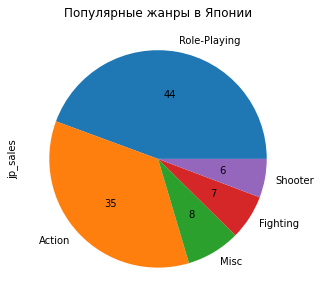

In [39]:
jp_genre_top.plot( y='jp_sales', kind = 'pie', figsize =(10,5), autopct = '%.0f', title = 'Популярные жанры в Японии')

Картина в Японии принципиально другая, тут на место популярного жанра - шутер, пришел жанр игр 'Ролевые', следующее место у жанра 'Экшн' тут Японцы также любят его, как и другие регионы.

<div class="alert alert-info">
<b>
</b>
    Теперь Япония тоже больше увлечена Экшном, после идет Ролевые игры.
</div>

<div class="alert alert-info">
<b>
</b>
    v2
Изменив годы исследования получили, что с 2013-2016 преимущество у РП, далее идет Экшн и совсем мало для оставшихся позиций.
</div>

In [40]:
eu_jp_na_genre = pd.DataFrame(data=[na_genre_top,eu_genre_top, jp_genre_top,]).T

In [41]:
eu_jp_na_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,NaN
Role-Playing,46.40,36.97,51.04
Misc,27.49,NaN,9.20
Racing,NaN,20.19,NaN
Fighting,NaN,NaN,7.65


<AxesSubplot:title={'center':'Сравнение популярных жанров в разный регионах'}, xlabel='genre'>

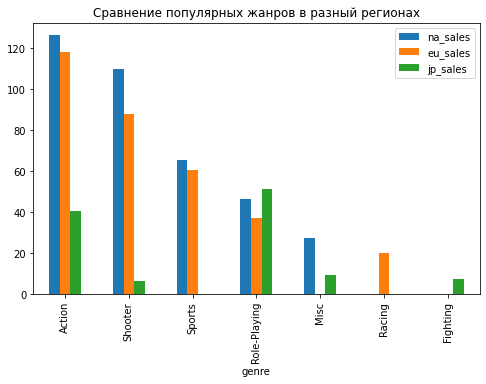

In [42]:
eu_jp_na_genre.plot(kind = 'bar', figsize =(8,5), title = 'Сравнение популярных жанров в разный регионах')

На диаграмме видно, что интересы Северной Америки и Европы практически идентичны, они отдают предпочтение одинаковым жанрам/

<div class="alert alert-info">
<b>
</b> v2
По прежнему интересы Сев.Америки и Европы схожи, Япония отличается значительно. </div>

In [43]:
data['rating'] = data['rating'].fillna('unknown')

Необходимо заменить значения 'NaN' для дальнейшего проведения расчета, заполним их на 'unknown'.

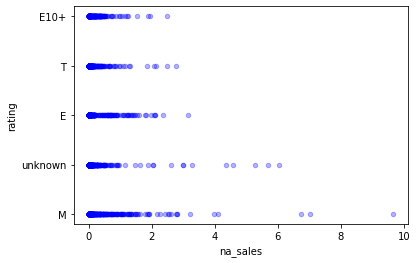

In [44]:
actual_rating_na=(
    data
    .query("2013 <= year_of_release <= 2016")
    .plot(x='na_sales', y='rating', kind='scatter',  alpha=0.3, color = 'blue')
)

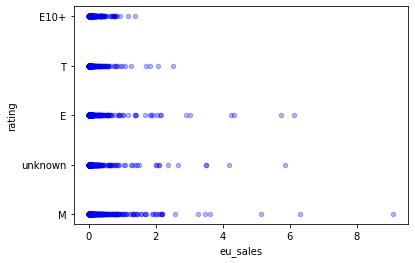

In [45]:
actual_rating_eu=(
    data
    .query("2013 <= year_of_release <= 2016")
    .plot(x='eu_sales', y='rating', kind='scatter',  alpha=0.3, color = 'blue')
)

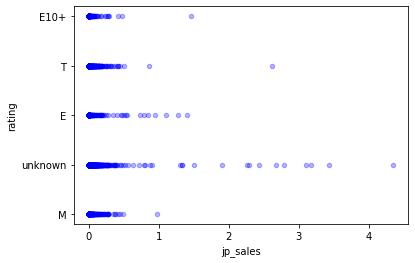

In [46]:
actual_rating_jp=(
    data
    .query("2013 <= year_of_release <= 2016")
    .plot(x='jp_sales', y='rating', kind='scatter',  alpha=0.3, color = 'blue')
)

In [47]:
#data.plot(x='na_sales', y='rating', kind='scatter',  alpha=0.3, color = 'blue')


In [48]:
#data.plot(x='eu_sales', y='rating', kind='scatter',  alpha=0.3, color = 'blue')

In [49]:
#data.plot(x='jp_sales', y='rating', kind='scatter', alpha=0.3, color = 'blue')

<div class="alert alert-info">
<b>
C 2013 года выделяются всего 4 рейтинга и столбец, который мы сделали из пустых оценок.
В Японии рейтинги примерно одинаково выстроены, тут видим небольшие выбросы, но их мало, в основном яркий цвет у начальных значений,
в Европе далеко ушло значение 'М', следовательно большинство игр имеют такой рейтинг,
в Америке же рейтинг 'М' тоже лидирует, но совсем недалеко ушел и '
</div>

<div class="alert alert-info">
<b>
</b>
v2
По прежнему, рейтинги сформированы практически однородно. в Японии - впереди столбец 'unknown', который был заполнен пропущенными значениями, опять же получены они могли быть совершенно по -разному.
В европе рейтинг М имеет больше значений, чем остальные.
В Америке - тоже столбец М, но и Е не далеко.
</div>

In [50]:
XOne= data.query('platform == "XOne" and user_score > 0 and year_of_release > 2012')

XOne['user_score'].mean()

6.521428571428572

In [51]:
PC= data.query('platform == "PC" and user_score > 0 and year_of_release > 2012')
PC['user_score'].mean()


6.2696774193548395

 Средний рейтинг пользователей для платформы Xone -  6.521428571428572
 
 Средний рейтинг пользователей для платформы PC -  6.2696774193548395
Cформулируем нулевую и альтернативную гипотезу:

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза H1:Cредние пользовательские рейтинги платформ Xbox One и PC различаются.




In [52]:
from scipy import stats as st
alpha = 0.05

results = st.ttest_ind(PC['user_score'], XOne['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Рейтинг действительно практически одинаковый, нулевая гипотеза принимается.

In [53]:
Action= data.query('genre == "Action" and user_score > 0 and year_of_release > 2012')
Action['user_score'].mean()

6.837532133676092

In [54]:
Sports= data.query('genre == "Sports" and user_score > 0 and year_of_release > 2012')
Sports['user_score'].mean()

5.238124999999999

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 Средний рейтинг пользователей для жанров Action - 6.837532133676092
 
 Средний рейтинг пользователей для жанров Sports - 5.238124999999999


Cформулируем нулевую и альтернативную гипотезу: 

- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза H1:Cредние пользовательские рейтинги жанров Action и Sports различаются.


In [55]:
alpha = 0.05

results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, а значит рейтинги разные.



Критерий был выбран для проверки двух выборок, предположение  имеют ли они одинаковый рейтинг.
Его как раз используют для проверки на равенство.

Выводы:

Завершив проект, теперь следует выделить ключевые моменты для формирования общего представления о полученных нами данных.
В начале работы мы сделали разбивку по количеству выпущенных игр в годах, и выяснили, что самое большое количество игр было выпущено в 2008 году.

с 2012 года видим, что на рынке лидирующие позиции занимают платформы PS и XBOX. отступая от проекта можно сказать, что они и по сей день занимают высокие позиции. 
Платформа 3DS тоже занимает высокое положение по количеству выпущенных игр, но с годами рейтинг стремится вниз. 
Лидером 2016 года стала PS4, не смотря на год выпуска (2013), даже спустя 3 года остается в лидерах. Далее идут XOne и PS Vita.


Рейтинг не сильно влияет на продажи, но даже не смотря на это, в регионах есть 'любимые' жанры и противоположные.

Касательно жанров,
В Северной Америке - отдают большее предпочтение играм жанров 'Экшн', 'Шутер'.
В Японии же на место популярного жанра - 'шутер', пришел жанр игр 'Ролевые', следующее место у жанра 'Экшн' тут Японцы также любят его, как и другие регионы.
Картина по Европе примерно одинакова с Америкой, тут люди также чаще выбирают 'Экшн' и 'Шутер', чем другие игры.
В общем сравнивая эти 3 региона, можно сказать, что сильнее всего отличается 'Япония', Северная Америка и Европа примерно одинакова в своих предпочтениях.

<div class="alert alert-info">
<b>
</b>
В рейтингах топ платформ, PS4, PS3, X360, XOne, 3DS. 
    
Эти платформы до сих пор держат неплохие позиции. Возможно, это связано с тем, как мы выяснили, что средняя продолжительность их жизни около 10 лет. 
    
Хороший доход приносят такие жанры, как например - 'Платформа', 'Шутер', 'Спорт', 'Борьба', 'Экшн'.
    
В целом увлеченность жанрами не особо поменялось, единственное, что в Японии  изначально преимуществом обладал жанр РП, а после первое место перешло к Экшну.

</div>

<div class="alert alert-info">
<b>
</b> v2
Изменив актуализированный период, получили такие изменения:
Рейтинги сформированы практически однородно. 
в Японии - в лидерах столбец с  пропущенными значениями, опять же получены они могли быть совершенно по -разному. 
В Европе рейтинг М на первом месте.
В Америке - тоже столбец М, но и Е не далеко.
Интересы Сев.Америки и Европы во многм схожи, а вот Япония отличается значительно.

</div>